### N으로 표현

#### 1. 지문 이해 및 문제 풀이 계획

#### Dynamic Programming (동적계획법)
  - 주어진 최적화 문제를 재귀적인 방식으로 보다 작은 부분 문제로 나누어   
    부분 문제를 풀어, 이 해를 조합하여 전체 문제의 해답에 이르는 방식
  - 알고리즘의 진행에 따라 탐색해야 할 범위를 동적으로 결정함으로써 탐색 범위를 한정할 수 있음
  - 문제의 성질에 따라, 동적계획법으로 풀어냄으로써 탐색해야 하는 범위를 효과적으로 줄일 수 있음
      

- 예시: 피보나치 수열
  - 재귀함수로 구현 시 복잡도 : 지수함수의 형태   
    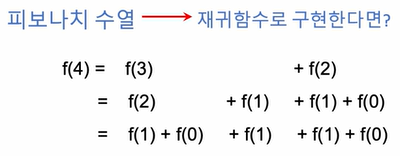
  - 동적계획법으로 구현 시 복잡도 : 선형함수의 형태  
    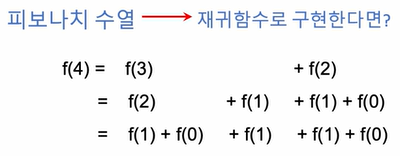

- 동적계획법의 적용 예시 : Knapsack Problem 
 

#### N으로표현 : 동적계획법으로 설계
  
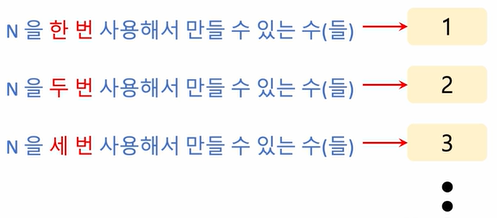
- 만들어진 수 중 number가 존재하면 해당 값이 N으로 표현하는 number
- 예제 : N=5
  - 1번 사용 : 5
  - 2번 사용 : 55와, (1번사용)과 (1번사용)의 사칙연산 조합 => 55, 10, 0, 25, 1
  - 3번 사용 : 555와, (1번사용)과 (2번사용)의 사칙연산 조합 => 555, 60, 15, 5 ...
  - 4번 사용 : 5555와, (1번사용)과 (3번사용)의 사칙연산 조합 / (2번사용)과 (2번사용)의 사칙연산 조합 
  
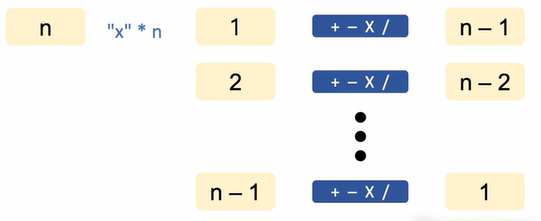

#### 2. 강사의 문제 풀이

- 강의 수강 전 문제 풀이

In [2]:
def calculation(_n):

    import itertools
    comb = list(itertools.combinations(list(_n.keys()),2))

    for i,j in comb:
        # N사용개수
        count_ij = _n[i] + _n[j]
        
        # 덧셈
        if (i+j) not in _n:
            _n[i+j] = count_ij
        else: 
            _n[i+j] = min(_n[i+j], count_ij)
        
        # 곱셈
        if (i*j) not in _n:
            _n[i*j] = count_ij
        else: 
            _n[i*j] = min(_n[i*j], count_ij)

        # 뺄셈
        if abs(i-j) not in _n:
            _n[abs(i-j)] = count_ij
        else: 
            _n[abs(i-j)] = min(_n[abs(i-j)], count_ij)

        # i와 j 비교 후 나눗셈
        if i>j:
            if (i//j) not in _n:
                _n[i//j] = count_ij
            else: 
                _n[i//j] = min(_n[i//j], count_ij)

        else:   
            if (j//i) not in _n:
                _n[j//i] = count_ij
            else: 
                _n[j//i] = min(_n[j//i], count_ij)
    return _n


def solution(N, number):
    
    # N으로 만들 수 있는 숫자 나열 
    n = [1,10,100,1000]
    _n = {}
    for i in range(1,len(n)+1):
        _n[sum(n[:i]*N)]=i 

    answer= 0
    for _ in range(4):
        if number in _n:
            if _n[number] >8:
                answer = -1
            else:
                answer = _n[number]
            break   
        else:
            _n = calculation(_n)
    

    return answer

- Mento's Comment

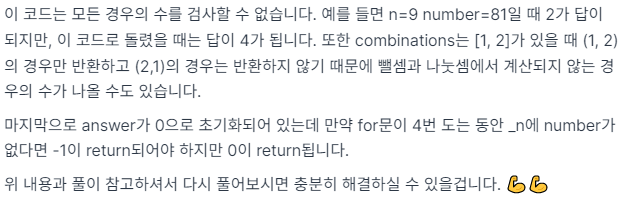

- Answer

In [5]:
def solution(N, number):
    
    # 1개의 set에 N을 i번 사용하여 만들 수 있는 숫자 기록
    # set()자료구조 : 중복허용X
    s = [set() for x in range(8)]
    for i,x in enumerate(s, start=1): #index를 1부터로 고려
        x.add(int(str(N)*i))

    # s의 해당집합(N사용횟수)은 ----------------- 4번을 사용했을 때 set()이라고 하면,
    for i in range(1,len(s)):
        # 이전 계산된 집합들의 조합으로 구성 ----- (1,3), (2,2), (3,1)의 set을 찾기 위함
        for j in range(i):
            # 사칙연산 앞 원소 ------------------ 1set, 2set, 3set
            for op1 in s[j]: 
                # 사칙연산 뒤 원소 -------------- 3set, 2set, 1set
                for op2 in s[i-j-1]:
                    s[i].add(op1 + op2)
                    s[i].add(op1 - op2)
                    s[i].add(op1 * op2)
                    if op2 != 0:
                        s[i].add(op1 // op2)

        # if문을 for 사이에 둘 수 있음!
        if number in s[i]:
            answer = i +1
            break
    else:
        answer = -1
    return answer

solution(9,81)

2